# Проект: Сборный проект №2

# Цели проекта:
- Проанализировать поведение пользователей,
- Оценить результаты А/Б теста по изменениям интерфейса приложения.

# Задачи:
 - Изучить воронку продаж,
 - Проанализировать результаты результаты A/A/B-теста,

# Исходные данные:

Каждая запись в логе — это действие пользователя, или событие. 

EventName — название события;

DeviceIDHash — уникальный идентификатор пользователя;

EventTimestamp — время события;

ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

# План работы:

- 1 Подготовка рабочей среды и загрузка данных
    - 1.1 Импорт библиотек
    - 1.2 Загрузка данных
    - 1.3 Проверка содержимого
    - 1.4 Изучение полученных данных
    - 1.5 Вывод по разделу


- 2 Подготовка данных
    - 2.1 Приведение названий столбцов к правилам хорошего тона
    - 2.2 Обработка пропусков
    - 2.3 Приведение типов данных
        - 2.3.1 Добавление столбца даты и времени
        - 2.3.2 Добавление столбца дат
    - 2.4 Обработка дубликатов
        - 2.4.1 Обработка полных дубликатов
        - 2.4.2 Обработка неявных дубликатов
    - 2.5 Вывод по разделу


- 3  Изучение и проверка данных
    - 3.1 Подсчёт событий в логе
    - 3.2 Подсчёт пользователей в логе
    - 3.3 Подсчёт среднего числа событий на одного пользователя в логе
    - 3.4 Анализ временного периода данных
        - 3.4.1 Максимальная дата
        - 3.4.2 Минимальная дата
        - 3.4.3 Анализ изменения количества данных с течением времени
        - 3.4.4 Отсечение неполных и устаревших данных
    - 3.5 Анализ доли утраченных пользователей и данных после отсечения
    - 3.6 Проверка наличия пользователей из всех трёх экспериментальных групп
    - 3.7 Вывод по разделу


- 4 Изучение воронки событий
    - 4.1 Сортировка событий по частоте
    - 4.2 Изучение вовлечённости пользователей
        - 4.2.1 Сортировка событий по числу пользователей
        - 4.2.2 Расчёт доли пользователей, которые хоть раз совершали событие
    - 4.3 Исследование воронки событий
        - 4.3.1 Построение воронки событий 
        - 4.3.2 Расчёт конверсии по ступеням воронки событий 
        - 4.3.3 Анализ потерь пользователей на этапах воронки событий
        - 4.3.4 Расчёт доли пользователей, полностью прошедших воронку событий 
    - 4.4 Вывод по разделу 


- 5 Исследование результатов эксперимента
    - 5.1 Проверка аномалий и выбросов
        - 5.1.1 Проверка пересечений пользователей между группами
        - 5.1.2 проверка и удаление аномалий и выбросов
            - 5.1.2.1 Пользователи, совершившие слишком много событий
    - 5.2 Анализ А/А теста 
    - 5.3 А/Б тест для обеих контрольных групп
    - 5.4 А/Б тест для объединённой контрольной группы
    - 5.5 Оценка необходимого уровня значимости 
    - 5.6 Вывод по разделу

- 6 Вывод по проделанной работе 

- 7 Итоги и рекомендации

## Подготовка рабочей среды и загрузка данных

### Импорт библиотек и подготовка рабочей среды

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})
import scipy.stats as st
import datetime as dt
import math 
from plotly import graph_objects as go
import numpy as np
pd.options.display.max_colwidth = 1
pd.options.display.float_format = '{:,.3f}'.format

### Загрузка данных

In [158]:
data = pd.read_csv('logs_exp.csv', sep='\t')

### Проверка содержимого

In [159]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Изучение полученных данных

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


EventName - поле текстового типа. 
Содержит название события.

DeviceIDHash - целочисленное поле.
Идентификатор пользователя.

EventTimestamp - целочисленное поле.
Время события. Тип необходимо изменить на дату.

ExpId - целочисленное поле.
Номер группы.

### Вывод по разделу

Явных пропусков в таблицах не обнаружено. Численные переменные заданы верно. Данные, касающиеся даты и времени необходимо преобразовать в соответствующий формат из текстового.

## Подготовка данных

### Приведение названий столбцов к правилам хорошего тона

In [161]:
data.columns = ['event', 'user_id', 'timestamp', 'group']

### Обработка пропусков

In [162]:
data.isna().sum()

event        0
user_id      0
timestamp    0
group        0
dtype: int64

Явных пропусков нет

### Приведение типов данных

#### Добавление столбца даты и времени

In [163]:
data['date_time'] = pd.to_datetime(data['timestamp'], unit='s') 

#### Добавление столбца дат

In [164]:
data['date'] = data['date_time'].dt.date

### Обработка дубликатов

#### Обработка полных дубликатов

In [165]:
data.duplicated().sum()

413

In [166]:
data.duplicated().sum()/data['user_id'].count()

0.0016917493425526163

Число полных дубликатов крайне мало. Их можно удалить.

In [167]:
data=data.drop_duplicates().reset_index(drop=True);

#### Обработка неявных дубликатов

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      243713 non-null  object        
 1   user_id    243713 non-null  int64         
 2   timestamp  243713 non-null  int64         
 3   group      243713 non-null  int64         
 4   date_time  243713 non-null  datetime64[ns]
 5   date       243713 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [169]:
data.duplicated(['event','user_id','timestamp']).sum()

0

Единственным вариантом неявных дубликатов может быть запись одного события одновременно в две группы.
Неявные дубликаты в данных отсутствуют.

### Вывод по разделу

Названия столбцов были приведены к правилам хорошего тона.

Пропусков в данных не обнаружено.

Были добавлены поля с датой и датой и временем события.

Из данных было удалено 413 дубликатов.

Неявные дубликаты в данных выявлены не были.

## Изучение и проверка данных

### Подсчёт событий в логе

In [170]:
print(f'В данных представлено {data.event.nunique()} типов событий')

В данных представлено 5 типов событий


Количество событий каждого типа

In [171]:
data['event'].value_counts()

event
MainScreenAppear           119101
OffersScreenAppear         46808 
CartScreenAppear           42668 
PaymentScreenSuccessful    34118 
Tutorial                   1018  
Name: count, dtype: int64

Наибольшее число у посещения главной страницы.
Оно вдвое больше чем суммарное число любого из остальных событий.

На втором месте число посещений страницы предложений, далее, страница ввода данных карты.

На четвёртом месте экран успешной оплаты.

Замыкает руководство пользователя с минимальным числом событий, составляющим менее процента от числа посещений главной страницы.

### Подсчёт пользователей в логе

In [172]:
print(f'В данных представлено {data.user_id.nunique()} уникальных пользователя')

В данных представлено 7551 уникальных пользователя


### Подсчёт среднего числа событий на одного пользователя в логе

In [173]:
print('Среднее число событий на пользователя:', round(data.groupby('user_id').agg({'event':'count'}).reset_index(drop=True).mean()['event'],1));

Среднее число событий на пользователя: 32.3


### Анализ временного периода данных

#### Максимальная дата

In [174]:
print('Конец рассматриваемого периода:', data.date.max())

Конец рассматриваемого периода: 2019-08-07


#### Минимальная дата

In [175]:
print('Начало рассматриваемого периода:', data.date.min());

Начало рассматриваемого периода: 2019-07-25


#### Анализ изменения количества данных с течением времени

Группировка данных по дате и типу события и подсчет количества событий

In [176]:
events_per_day_per_group = (data
                        .groupby(['date', 'group'])
                        .size()
                        .unstack(fill_value=0)
                       )

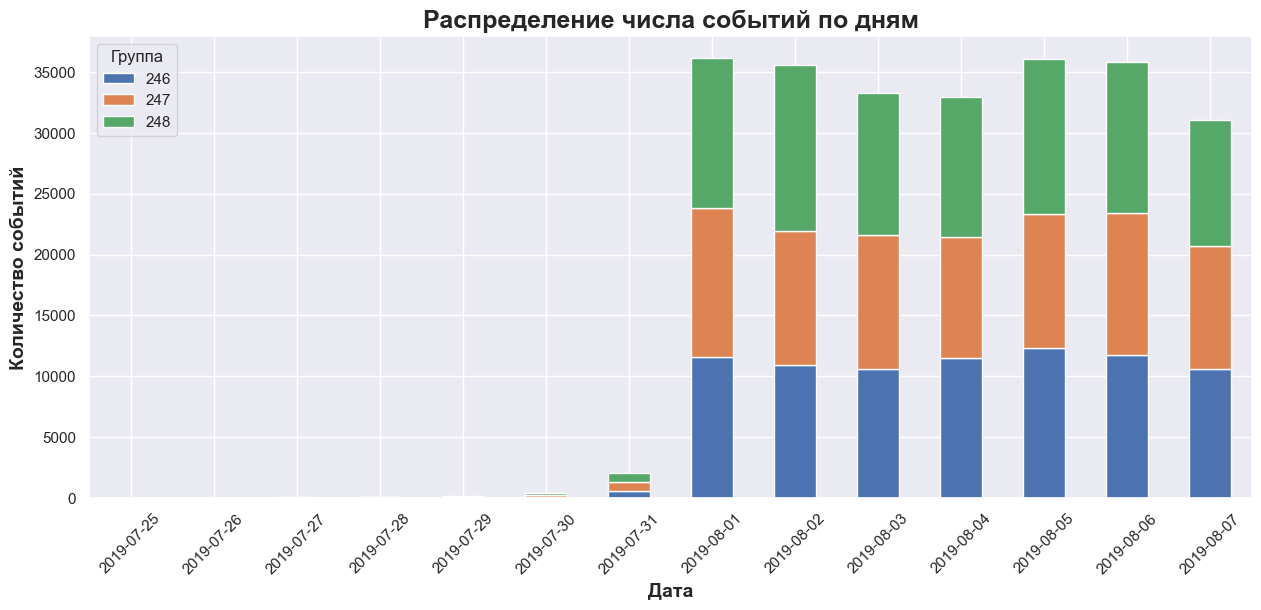

In [177]:
events_per_day_per_group.plot(kind='bar',
                          stacked=True,
                          figsize=(15, 6))


plt.title('Распределение числа событий по дням', fontsize=18, weight='bold')
plt.xlabel('Дата', fontsize=14, weight='bold')
plt.ylabel('Количество событий', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.legend(title='Группа')

plt.show()

До 31.07.2019 число событий крайне мало относительно последующего периода.
По графику также хорошо видно составляющие воронки событий.

#### Отсечение неполных и устаревших данных

In [178]:
print('Доля событий, произошедших до 31.07.2019: {:,.3f} %'.format(
    data[data['date']<pd.to_datetime('2019-07-31', format = '%Y-%m-%d').date()]['date'].count()/data['date'].count()
)
)

Доля событий, произошедших до 31.07.2019: 0.003 %


Все дни до 31.07.2019 включительно содержат очень мало событий, относительно последующих дней до конца рассматриваемого периода.

Учёт их в анализе нецелесообразен т.к. их удельный вес крайне мал. 

In [179]:
datasize=[[],[]]

Сохранение числа пользователей и событий до отсечения по дате.

In [180]:
datasize[0]=data.event.count()
datasize[1]=data.user_id.nunique()

In [181]:
data=data[data.date>pd.to_datetime('2019-07-31', format = '%Y-%m-%d').date()]

### Анализ доли утраченных пользователей и данных после отсечения

Доля утраченных событий

In [182]:
print(f'Из данных было удалено {datasize[0]-data.event.count()} записей.\n Это {(1-data.event.count()/datasize[0]):.2%} всех данных.')

Из данных было удалено 2826 записей.
 Это 1.16% всех данных.


Доля утраченных пользователей

In [183]:
print(f'Из данных было удалено {datasize[1]-data.user_id.nunique()} уникальных пользователей.\n Это {(1-data.user_id.nunique()/datasize[1]):.2%} всех уникальных пользователей.')

Из данных было удалено 17 уникальных пользователей.
 Это 0.23% всех уникальных пользователей.


Этот объём не должен оказать существенного влияния на результаты анализа.

### Проверка наличия пользователей из всех трёх экспериментальных групп

Число пользователей в каждой из групп

In [184]:
data.groupby('group')['user_id'].nunique()

group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

Соотношение размеров групп, приведённое к доле от наибольшего значения.

In [185]:
data.groupby('group')['user_id'].nunique()/max(data.groupby('group')['user_id'].nunique())

group
246   0.979
247   0.991
248   1.000
Name: user_id, dtype: float64

Соотношение размеров группы 246 не удовлетворяет требованиям корректности проведения А/Б тестов.

Допустимое отклонение - 1%.

Проверим соотношение долей пользователей в группах 246 и 247

In [186]:
from statsmodels.stats.proportion import proportions_ztest
# Проведем несколько тестов:
count = np.array([data.query('event != "Tutorial" and group == 246')['user_id'].nunique(),
                 data.query('event != "Tutorial" and group == 247')['user_id'].nunique()])
nobs = np.array([data.query('event != "Tutorial" and group in (246, 247)')['user_id'].nunique(),
                 data.query('event != "Tutorial" and group in (246, 247)')['user_id'].nunique()])
stat, pval = proportions_ztest(count, nobs)
alpha = 0.05

print('H0: доли пользователей групп А1 и А2 равны')
print('H1: доли пользователей групп А1 и А2 различаются')

print('p-value = {:0.3f}'.format(pval))
print('уровень значимости = {:0.2f}'.format(alpha))
if pval >= alpha: print('Нулевая гипотеза не отвергается')
else: print('Нулевая гипотеза отвергается')

print('='*40)

count = data.query('event != "Tutorial" and group == 246')['user_id'].nunique()
nobs = data.query('event != "Tutorial" and group in (246, 247)')['user_id'].nunique()
value = .5
stat, pval = proportions_ztest(count, nobs, value)
alpha = 0.05

print('H0: вероятность попасть в группу А1 составляет 50%')
print('H1: вероятность попасть в группу А1 отличается от 50%')

print('p-value = {:0.3f}'.format(pval))
print('уровень значимости = {:0.2f}'.format(alpha))
if pval >= alpha: print('Нулевая гипотеза не отвергается')
else: print('Нулевая гипотеза отвергается')

H0: доли пользователей групп А1 и А2 равны
H1: доли пользователей групп А1 и А2 различаются
p-value = 0.562
уровень значимости = 0.05
Нулевая гипотеза не отвергается
H0: вероятность попасть в группу А1 составляет 50%
H1: вероятность попасть в группу А1 отличается от 50%
p-value = 0.682
уровень значимости = 0.05
Нулевая гипотеза не отвергается


Различие в числе пользователей между группами 246 и 247 несущественно для результатов тестирования.

### Вывод по разделу

В данных представлено 5 видов событий. По числу событий каждого типа хорошо видно составляющие воронки событий.

Число уникальных пользователей - 7551.

Среднее число событий на пользователя - 32.

Полный период, представленный в данных:
С 25.07.2019 по 07.08.2019 т.е. 14 дней.

После анализа распределения числа событий по датам, данные до 31.07.2019 включительно, были удалены т.к. общее число событий, произошедшее в эти даты составило менее 1.2% от всех.

Анализ событий за эти даты нецелесообразен и не может оказать существенного влияния на результаты тестов.

Таким образом в дальнейшем будет рассматриваться период в 6 дней: с 31.07.2019 по 07.08.2019.

## Изучение воронки событий

### Сортировка событий по частоте

In [187]:
data['event'].value_counts().sort_values(ascending=False)

event
MainScreenAppear           117328
OffersScreenAppear         46333 
CartScreenAppear           42303 
PaymentScreenSuccessful    33918 
Tutorial                   1005  
Name: count, dtype: int64

Наиболее посещаемая страница - главная.

За ней идёт страница предложений, следом страница покупок, потом экран успешной оплаты.

Самая низкая посещаемость у руководства пользователя.

### Изучение вовлечённости пользователей

#### Сортировка событий по числу пользователей

In [188]:
events_grouped=data.groupby('event')\
.agg({'user_id':'nunique'})\
.reset_index()\
.sort_values(by='user_id',ascending=False )\
.reset_index(drop=True)
events_grouped.columns = ['event', 'user_nums']
print(events_grouped)

                     event  user_nums
0  MainScreenAppear         7419     
1  OffersScreenAppear       4593     
2  CartScreenAppear         3734     
3  PaymentScreenSuccessful  3539     
4  Tutorial                 840      


Число уникальных пользователей на каждое из событий пропорционально числу каждого из событий.

#### Расчёт доли пользователей, которые хоть раз совершали событие

Процент пользователей, совершивших хотя бы одно событие.

In [189]:
events_grouped['user_ratio']=events_grouped['user_nums']/(data.user_id.nunique())
print(events_grouped)

                     event  user_nums  user_ratio
0  MainScreenAppear         7419      0.985      
1  OffersScreenAppear       4593      0.610      
2  CartScreenAppear         3734      0.496      
3  PaymentScreenSuccessful  3539      0.470      
4  Tutorial                 840       0.111      


Практически все пользователи посещали главный экран (~99%).

61% пользователей посетил страницу предложений.

Почти 50% пользователей посетили экран ввода данных карты.

47% пользователей увидели экран успешной оплаты.

Только 11% пользователей воспользовались руководством пользователя.

### Исследование воронки событий

#### Построение воронки событий 

Из пункта выше следует, что воронка событий выглядит следующим образом:
- 1) MainScreenAppear
- 2) OffersScreenAppear
- 3) CartScreenAppear
- 4) PaymentScreenSuccessful

Событие "Показ руководства пользователя" не входит в воронку событий т.к. его доля значительно меньше, чем у прочих событий и оно не участвует в продажах, являясь сервисом помощи для заблудившихся и запутавшихся пользователей.

Показатель в 11% пользователей, обратившихся за помощью говорит что сайт понятен, но не интуитивен.
Падение конверсии с по мере продвижения пользователя по воронке событий может быть вызвано тем, что пользователи не справлялись с интерфейсом.

#### Проверка на последовательность действий пользователей.

In [190]:
# Создание таблицы 5*5 с отношением числа уникальных пользователей в каждом событии
#с целью впоследтвии присоединить её к events_grouped
intersection_ratios=pd.DataFrame()
intersection_ratios['event']=events_grouped['event']
for ev in events_grouped['event']:
    intersection_ratios[ev]=0
intersection_ratios['funnel']=0
intersection_ratios['conversion']=0

In [191]:
# Создание списка, содержащего списки уникальных пользователей для каждого из событий
sets_list=[[],[],[],[],[]]
for event_num, event_name in enumerate(events_grouped['event']):
    sets_list[event_num]=set(data[data["event"] == event_name]["user_id"].unique())

In [192]:
# Расчёт доли пересекающихся пользователей для каждого из событий.
# Доля считается для основного события в сравнении поэтому значения 
# сверху и снизу от главной диагонали отличаются.

for event_num1, event_name1 in enumerate(events_grouped["event"]):
    for event_num2, event_name2 in enumerate(events_grouped["event"]):

        intersection_ratios.loc[intersection_ratios["event"]==event_name1,event_name2]\
        =len(sets_list[event_num1].intersection(sets_list[event_num2]))/\
        events_grouped.loc[events_grouped['event']==event_name1,'user_nums']

C:\Users\mihai\AppData\Local\Temp\ipykernel_7888\1377557986.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.60412455]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intersection_ratios.loc[intersection_ratios["event"]==event_name1,event_name2]\
C:\Users\mihai\AppData\Local\Temp\ipykernel_7888\1377557986.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.48995822]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intersection_ratios.loc[intersection_ratios["event"]==event_name1,event_name2]\
C:\Users\mihai\AppData\Local\Temp\ipykernel_7888\1377557986.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.46380914]' has dtype incompatible with int64, please explicitly cast to a compa

In [193]:
# Выделение последовательной конверсий по воронке событий в поле 'funnel'
for event_num1, event_name1 in enumerate(events_grouped["event"]):
    for event_num2, event_name2 in enumerate(events_grouped["event"]):
         if event_num2+1==event_num1:
            intersection_ratios.loc[intersection_ratios['event']==event_name1,'funnel']=intersection_ratios[event_name1].iloc[event_num2];

C:\Users\mihai\AppData\Local\Temp\ipykernel_7888\4184249240.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6041245450869389' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intersection_ratios.loc[intersection_ratios['event']==event_name1,'funnel']=intersection_ratios[event_name1].iloc[event_num2];


In [194]:
intersection_ratios

,event,MainScreenAppear,OffersScreenAppear,CartScreenAppear,PaymentScreenSuccessful,Tutorial,funnel,conversion
0,MainScreenAppear,1.000,0.604,0.490,0.464,0.113,0.000,0
1,OffersScreenAppear,0.976,1.000,0.801,0.769,0.140,0.604,0
2,CartScreenAppear,0.973,0.985,1.000,0.946,0.145,0.801,0
3,PaymentScreenSuccessful,0.972,0.998,0.999,1.000,0.132,0.946,0
4,Tutorial,0.995,0.767,0.645,0.556,1.000,0.132,0


Из данных следует что пользователи иногда пропускали этапы воронки событий, но число таких пользователей относительно невелико.

Это также говорит о некорректности проведения А/Б теста.

#### Расчёт конверсии по ступеням воронки событий

In [195]:
for event_num1, event_name1 in enumerate(events_grouped["event"]):
    intersection_ratios.loc[intersection_ratios['event']==event_name1,'conversion']\
    =intersection_ratios[event_name1].iloc[0]

C:\Users\mihai\AppData\Local\Temp\ipykernel_7888\3893292763.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6041245450869389' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intersection_ratios.loc[intersection_ratios['event']==event_name1,'conversion']\


In [196]:
events_grouped['funnel']=intersection_ratios['funnel']
events_grouped['conversion']=intersection_ratios['conversion']               
events_grouped=events_grouped.loc[[0,1,2,3],:]

In [197]:
events_grouped

,event,user_nums,user_ratio,funnel,conversion
0,MainScreenAppear,7419,0.985,0.000,1.000
1,OffersScreenAppear,4593,0.610,0.604,0.604
2,CartScreenAppear,3734,0.496,0.801,0.490
3,PaymentScreenSuccessful,3539,0.470,0.946,0.464


#### Анализ потерь пользователей на этапах воронки событий

In [198]:
events_grouped[['event','funnel']]

,event,funnel
0,MainScreenAppear,0.000
1,OffersScreenAppear,0.604
2,CartScreenAppear,0.801
3,PaymentScreenSuccessful,0.946


Наибольшие потери происходят при переходе на экран предложений (OffersScreenAppear) - 60% всех пользователей. На данном этапе возможна проблема с интуитивностью расположения кнопки выбора предложения (покупки) товара. Но нельзя исключать того что пользователям просто что то не понравилось и они передумали или вообще открыли страницу ошибочно. Т.к. информации о наличии цен на главной странице нет, предположение о том что пользователям не понравилась цена - мы не можем.

Потери при переходе пользователей на этап ввода данных карты составляют 20%, причём судя по результатам сравнений групп пользователей, на этап успешной оплаты переходит примерно такое же количество пользователей, следовательно, этап ввода данных карты пользователи пропустить не могут.
Причины этих потерь может быть неудволетворённость пользователей предложением (цены) или проблемы с интерфейсом.

Потери при переходе на этап успешной покупки минимальны и составляют 5%. Полагаю у пользователей практически не возникает проблем с вводом данных карты и оплатой.

Отдельно необходимо отметить что более 13% пользователей, совершивших успешную оплату пользовались руководством пользователя, причём это значение ±неизменно для всех этапов воронки событий. 
Половина пользователей, которые воспользоватись руководством успешно завершили оплату.

Это означает что пользователям приходится нередко прибегать к руководству пользователя для того чтобы разобраться в интерфейсе. Это косвенно подтверждает наличие проблем не технического характера, приводящих к падению конверсии на некоторых этапах воронки событий.
Наибольшее подозрение вызывает относительно низкая конверсия с главной страницы на страницу предложений.

#### Расчёт доли пользователей, полностью прошедших воронку событий

In [199]:
events_grouped[['event','conversion']]

,event,conversion
0,MainScreenAppear,1.000
1,OffersScreenAppear,0.604
2,CartScreenAppear,0.490
3,PaymentScreenSuccessful,0.464


Из пользователей, посетивших главную страницу только чуть больше 46% успешно оплатили заказ.

### Вывод по разделу 

Наиболее посещаемая страница - главная.

За ней идёт страница предложений, следом страница покупок, потом экран успешной оплаты.

Самая низкая посещаемость у руководства пользователя.

По всем возможным количественным оценкам события сохраняют порядок следования.

Воронка событий состоит из 4 первых перечисленных выше событий:
Открытие главной страницы  открытие страницы предложений -> 
открытие страницы ввода данных карты -> экран успешной оплаты.

Конверсия по этапам воронки событий составила:

	MainScreenAppear -> OffersScreenAppear	60%
	OffersScreenAppear -> CartScreenAppear	80%
	CartScreenAppear -> PaymentScreenSuccessful	95%

Наибольшие потери при переходе с главной страницы на страницу предложений - 40%.
Потери при переходе со страницы предложений на страницу ввода карты тоже существенные - 20%.

Из пользователей, посетивших главную страницу только чуть больше 46% успешно оплатили заказ.

Отдельно необходимо обратить внимание что воронка событий не всегда соблюдается строго: менее 3% пользователей в каждом событии посещали любую другую страницу не открывая главной.
Это может исказить данные эксперимента.

Также необходимо отметить что порядка 13% пользователей посетили страницу с руководством пользователя, причём доля посетителей, успешно оплативших заказ среди посетителей, открывших страницу с руководством пользователя составляет более 55%.

Это может говорить о наличии проблем с понятностью и интуитивностью интерфейса для пользователей.

## Исследование результатов эксперимента

### Проверка аномалий и выбросов

#### Проверка пересечений пользователей между группами

In [200]:
# Проверим пользователей, которые могли участвовать в двух или нескольких группах одновременно:
data.groupby('user_id').agg({'group':'nunique'}).query('group > 1') 

,group
user_id,


Пересечений пользователей между группами не обнаружено

#### Проверка и удаление аномалий и выбросов

##### Пользователи, совершившие слишком много событий

In [201]:
ordersByUsers = (
    data.groupby('user_id', as_index=False)
    .agg({'event': 'count'}))

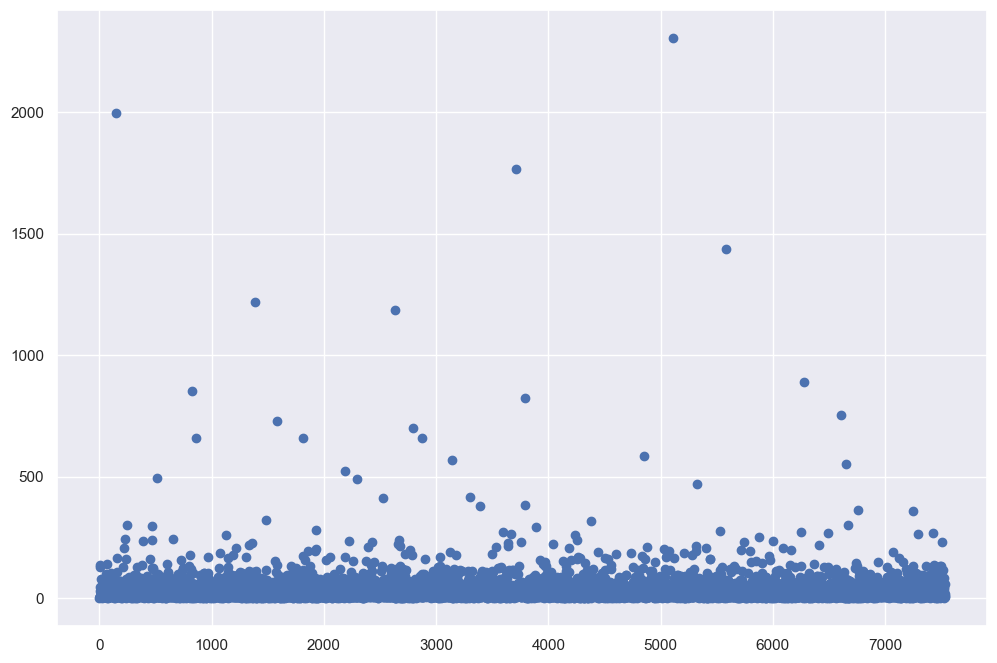

In [202]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['event']);

Количество событий на пользователя в среднем не превышает 250.

Для более точной оценки посчитаем перцентили

In [203]:
print(np.percentile(ordersByUsers['event'], [90, 95, 99]))

[ 64.    88.   201.01]


Менее 1% всех пользователей совершали более 200 действий.

Пользователи, совершившие более 201 действия будут отсеяны.

Это могут быть боты или корпоративные покупатели. Их поведение отличается от поведения обычных пользователей, которое рассматривается в данном исследовании.

In [204]:
data=data[~data['user_id'].isin(ordersByUsers.loc[ordersByUsers['event']>201,'user_id'])]

### Анализ А/А теста

In [220]:
groups_info

,group_num,MainScreenAppear,OffersScreenAppear,CartScreenAppear,PaymentScreenSuccessful,user_nums,ratio
0,246,2423,1514,1238,1172,2456,0.978
1,247,2454,1498,1216,1136,2491,0.992
2,248,2467,1505,1204,1155,2511,1.000


In [221]:
groups_info.loc[len(groups_info.index)]=groups_info.loc[0]+groups_info.loc[1]

Так как размеры выборок различны, применим Z - тест.

В воронке 4 события и 4 группы (Включая объединённую), следовательно, необходимо провести 16 тестов.

При проведении множественных тестов в целях уменьшения ошибки первого рода необходимо применить поправку.

Применим поправку Бонферрони, тогда, при базовом уровне значимости alpha = 0.05:

In [222]:
alpha=0.05/16

In [223]:
def z_test(groups, alpha):
# Число пользователй в группе не меняется и его всегда можно получить по индексу группы в списке.    
    trials=[groups_info.loc[groups_info.group_num==groups[0],'user_nums'].values[0],\
                   groups_info.loc[groups_info.group_num==groups[1],'user_nums'].values[0]]
#    groups_info.loc[groups_info.group_num==groups[0],'user_nums'].values[0] 

# Проходим по событиям
    for event_num in range(1,5,1):
        successes=np.array([groups_info.loc[groups_info['group_num']==groups[0]\
                                   ,groups_info.columns[event_num]].values[0],\
                      groups_info.loc[groups_info['group_num']==groups[1]\
                                   ,groups_info.columns[event_num]].values[0]])

        p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
        p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
        difference = p1 - p2 
# считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)     
#Гипотеза двусторонняя    
        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('p-значение: ',(p_value),'\nalpha:','{:,.4f}'.format(alpha))
        print('Группы:',groups)
        print('Событие:', groups_info.columns[event_num])
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными\n'
    ) 

In [225]:
#Отдельно выделим А группы
groupsA=[246,247,493]

In [226]:
for i in range(0,len(groupsA),1):
    if i == len(groupsA)-1:
        z_test([groupsA[0],groupsA[i]],alpha)
    else:
        z_test([groupsA[i],groupsA[i+1]],alpha)

p-значение:  0.6730951807208485 
alpha: 0.0031
Группы: [246, 247]
Событие: MainScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.27702771700769824 
alpha: 0.0031
Группы: [246, 247]
Событие: OffersScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.26299626637167783 
alpha: 0.0031
Группы: [246, 247]
Событие: CartScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.13586258367273985 
alpha: 0.0031
Группы: [246, 247]
Событие: PaymentScreenSuccessful
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.809963827747165 
alpha: 0.0031
Группы: [247, 493]
Событие: MainScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.5326769394479234 
alpha: 0.0031
Группы: [247, 493]
Событие: OffersScreenAppear
Не получилось отвергнуть нулевую гипотез

Статистически значимых различий между группами нет.
Все группы А/А теста можно считать контрольными.

### А/Б тест для контрольной группы 246

In [227]:
z_test([248,246],alpha)

p-значение:  0.24380010740478975 
alpha: 0.0031
Группы: [248, 246]
Событие: MainScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.21751867407994285 
alpha: 0.0031
Группы: [248, 246]
Событие: OffersScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.08317408116828573 
alpha: 0.0031
Группы: [248, 246]
Событие: CartScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.2239322340682175 
alpha: 0.0031
Группы: [248, 246]
Событие: PaymentScreenSuccessful
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Статистически значимой разницы между контрольной группой 246 и экспериментальной группой 248 не выявлено.

### А/Б тест для контрольной группы 247

In [228]:
z_test([248,247],alpha)

p-значение:  0.4545336230756303 
alpha: 0.0031
Группы: [248, 247]
Событие: MainScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.8850746269495819 
alpha: 0.0031
Группы: [248, 247]
Событие: OffersScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.539679592997024 
alpha: 0.0031
Группы: [248, 247]
Событие: CartScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.7800603242138475 
alpha: 0.0031
Группы: [248, 247]
Событие: PaymentScreenSuccessful
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Статистически значимой разницы между контрольной группой 247 и экспериментальной группой 248 не выявлено.

###  А/Б тест для объединённой контрольной группы

In [229]:
z_test([248,493],alpha)

p-значение:  0.26186402859555846 
alpha: 0.0031
Группы: [248, 493]
Событие: MainScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.42801834712141273 
alpha: 0.0031
Группы: [248, 493]
Событие: OffersScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.17619153820927536 
alpha: 0.0031
Группы: [248, 493]
Событие: CartScreenAppear
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение:  0.5908710902173984 
alpha: 0.0031
Группы: [248, 493]
Событие: PaymentScreenSuccessful
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Статистически значимой разницы между объединённой контрольной группой и экспериментальной группой 248 не выявлено.

### Оценка необходимого уровня значимости 

Все тесты показали отсутствие статистически значимых различий между группами.
Если бы изначально уровень статистической значимости alpha был принят в 10%, то alpha с учётом поправки составила бы 0.00625, что не изменило бы результаты теста.

Минимальное значение alpha для получения хотя бы одного (ложно)положительного результата с учётом поправки составило бы 128% для групп 248 и 246, события CartScreenAppear.

При учёте того что alpha это вероятность получения ложного результата, такое значение уровня статистической значимости неадекватно.

### Вывод по разделу

Пересечений пользователей между группами не было обнаружено.

Пользователи, совершившие более 201 действия были отсеяны как аномальные.
Это значение было выбрано как равное одному перцентилю от всех пользователей.
Это могли быть боты или корпоративные покупатели.

Было обнаружено что множество пользователей перескакивали этапы воронки, причём это касается любых этапов в любой последовательности. Это может быть результатом технического сбоя, или технической ошибки на этапе технической реализации А/Б теста со стороны заказчика.

Число уникальных пользователей по группам:
- Группа А1: 2456
- Группа А2: 2491
- Группа B: 2511
 
Соотношение числа пользователей по группам к наибольшей группе:
- 	Группа	Соотношение
-	246 ------ 0.978
-	247 ------ 0.992
-	248 ------ 1.000
    
Из этих данных вижно что контрольная группа 246 не удовлетворяет требованию по разнице в числе пользователей между группами в 1%.

Для статистических тестов был принят Z-тест т.к. размеры выборок различны, а оцениваемые параметры количественные, а не качественные.

Выбранный уровень статистической значимости alpha = 0.05.

При проведении тестов была использована поправка Бонферрони.
- Число тестов 16:
- 4 А/А теста
- 12 А/Б тестов

Статистически значимых различий между обеими контрольными группами и объединённой контрольной групой не наблюдается. Все группы А/А были приняты как контрольные.

При проведении А/Б тестов была использована поправка Бонферрони.
Число тестов 16.
Статистически значимых различий выявлено не было.

При выбранной уровне статистической значимости alpha = 0.05 cтатистически значимых различий выявлено не было. Если бы принятый уровень статистической значимости был вдвое больше это не повлияло бы на результат.

## Вывод по проделанной работе 

При предобработке данных названия столбцов были приведены к правилам хорошего тона.
Также были добавлены столбцы даты и даты и времени.

Пропусков в данных обнаружено не было.

В данных было обнаружено 413 полных дубликатов. Они были удалены.
Неполные дубликаты в данных обнаружены не были.

В данных представлено 5 типов событий.

Количество событий каждого типа:

- MainScreenAppear           119101
- OffersScreenAppear         46808 
- CartScreenAppear           42668 
- PaymentScreenSuccessful    34118 
- Tutorial                   1018  

Среднее число событий на пользователя: 32.3.

Данные представлены с 2019-07-25 по 2019-08-07.

После оценки плотности данных на временном промежутке, все данные ранее до 31.07.2019 включительно были отсеяны. Из данных было удалено 2826 записей. Это 1.16% всех данных.

Число пользователей в каждой из групп

- Группа Число
- 246 ---- 2484
- 247 ---- 2513
- 248 ---- 2537

Соотношение числа пользователей по группам
- Группа Отношение
- 246 ---- 0.979
- 247 ---- 0.991
- 248 ---- 1.000

Согласно требованиям к распределению числа пользователей по группам, группа 246 не удовлетворяет требованиям к различию в числе пользователей между группами в 1%.

Число уникальных пользователей для каждого из событий и их доля от общего числа пользователей:
-   Событие                  Число     Доля
-   MainScreenAppear         7419      0.985      
-   OffersScreenAppear       4593      0.610      
-   CartScreenAppear         3734      0.496      
-   PaymentScreenSuccessful  3539      0.470      
-   Tutorial                 840       0.111  

Наиболее посещаемая страница - главная.
За ней идёт страница предложений, следом страница покупок, потом экран успешной оплаты.
Самая низкая посещаемость у руководства пользователя.

Согласно полученным данным, за воронку событий была принята следующая последовательность событий:
1) MainScreenAppear
2) OffersScreenAppear
3) CartScreenAppear
4) PaymentScreenSuccessful

Из данных следует что пользователи иногда пропускали этапы воронки событий, но число таких пользователей относительно невелико. При дальнейшем анализе было выявлено что доля пользователей, полностью прошедших воронку событий составляет 54%, что полностью дискредитирует имеющиеся данные.

Конверсия на этапах воронки:

- 	MainScreenAppear -> OffersScreenAppear	0.604
- 	OffersScreenAppear -> CartScreenAppear	0.801
- 	CartScreenAppear -> PaymentScreenSuccessful	0.946

Наибольшие потери наблюдаются на этапе перехода на страницу предложений - порядка 40%.
Потери при переходе на страницу ввода данных карты тоже существенные - порядка 20%.
Потери при переходе на страницу успешной оплаты небольшие и составляют чуть больше 5%.

Из пользователей, посетивших главную страницу только чуть больше 46% успешно оплатили заказ.

Отдельно необходимо отметить что более 13% пользователей, совершивших успешную оплату пользовались руководством пользователя, причём это значение ±неизменно для всех этапов воронки событий. Половина пользователей, которые воспользоватись руководством успешно завершили оплату.

Это означает что пользователям приходится нередко прибегать к руководству пользователя для того чтобы разобраться в интерфейсе. Это косвенно подтверждает наличие проблем не технического характера, приводящих к падению конверсии на некоторых этапах воронки событий. Наибольшее подозрение вызывает относительно низкая конверсия с главной страницы на страницу предложений.

При проверке аномалий и ошибок в данных пересечений пользователей между группами не обнаружено.

Пользователи, совершившие более 201 действия были отсеяны как аномальные. Это значение было выбрано как равное одному перцентилю от всех пользователей. Это могли быть боты или корпоративные покупатели.

Для статистических тестов был принят Z-тест т.к. размеры выборок различны, а оцениваемые параметры количественные, а не качественные.

Выбранный уровень статистической значимости alpha = 0.05.

При проведении тестов была использована поправка Бонферрони.
Число тестов 16.

Статистически значимых различий между А/А группами нет. Все группы А/А были приняты как контрольные.

Статистически значимых различий между А/Б группами выявлено не было.

При выбранной уровне статистической значимости alpha = 0.05 cтатистически значимых различий выявлено не было. Если бы принятый уровень статистической значимости был вдвое больше это не повлияло бы на результат.

## Итоги и рекомендации

По результатам исследования статистически значимых отличий в поведении пользователей контрольных и экспериментальной групп не найдено.

Качество предоставленных данных крайне низко, присутствуют многочисленные ошибки как при разбиении пользователей по группам, так и в фиксации действий пользователей на сайте. Результаты А/Б тесты не могут быть признаны действительными так как присутствовали грубые нарушения.

Вероятно имел место технический сбой, или порядок взаимодействия пользователей с сайтом имеет значительно более сложную структуру, нежели предположенная по воронке событий. Для верификации результатов, внесения правок и оценки возможности корректно проанализировать имеющиеся данные необходима консультация с представителем заказчика.

Конверсия с главной страницы очень низкая. Конверсия с предложения на оплату также испытывает определённые проблемы. Нельзя однозначно выявить проблему т.к. эти страницы предполагают ознакомление пользователя с продукцией и ценами, которые могут не удовлетворить его запросы. 

Однако половина пользователей, воспользовавшихся руководством успешно завершили заказ.
Вероятно пользователи испытывают некоторые проблемы с интерфейсом при использовании сервиса.